# Objectif

- Déployer la méthodologie vue pour la régression en classification.
- Utiliser le dataset `iris`.

# Mise en place

In [1]:
from rich import print
from rich.table import Table
from rich_rst import RestructuredText as RST

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import (
    load_iris, 
    load_digits,
)

In [4]:
from sklearn.dummy import DummyClassifier

In [5]:
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    cross_val_score,
)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [7]:
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
)

In [8]:
# Pour la phase finale de cross validation
resultats = dict()

# Prise en main dataset

## Chargement de l'objet

In [9]:
dataset = load_iris()
type(dataset)

sklearn.utils.Bunch

In [10]:
dir(dataset)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

## Description

In [11]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
    :Class Distribution: 33.3% for each of 3 classes.
    :Creator: R.A. Fisher
    :Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
    📅 July, 1988

The famous Iris database, first used by Sir R.A. Fisher. The dataset is taken
from Fisher's paper. Note that it's the same as in R, but not as in the UCI
Machine Learning Repository, which has two wrong data points.

This is perhaps the best known database to be found in the
pattern recognition literature.  Fisher's paper is a classic in the field and
is referenced frequently to this day.  (See Duda & Hart, for example.)  The
data set contains 3 classes of 50 instances each, where each class refers to a
type of iris plant.  One class is linearly separable from the other 2; the
latter are NOT linearly separable from each other.

.. topic:: References

   - Fisher, R.A. "The use of multiple measurements in taxonomic problems"
     Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to
     Mathematical Statistics" (John Wiley, NY, 1950).
   - Duda, R.O., & Hart, P.E. (1973) Pattern Classification and Scene Analysis.
     (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   - Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
     Structure and Classification Rule for Recognition in Partially Exposed
     Environments".  IEEE Transactions on Pattern Analysis and Machine
     Intelligence, Vol. PAMI-2, No. 1, 67-71.
   - Gates, G.W. (1972) "The Reduced Nearest Neighbor Rule".  IEEE Transactions
     on Information Theory, May 1972, 431-433.
   - See also: 1988 MLC Proceedings, 54-64.  Cheeseman et al"s AUTOCLASS II
     conceptual clustering system finds 3 classes in the data.
   - Many, many more ...

In [12]:
print(RST(dataset.DESCR))

╔═══════════════════════════════════════════════════════════════════════════════════════════╗
║                                    Iris plants dataset                                    ║
╚═══════════════════════════════════════════════════════════════════════════════════════════╝
Data Set Characteristics:

Number of Instances150 (50 in each of three classes)

Number of Attributes4 numeric, predictive attributes and the class

Attribute Information • sepal length in cm
 • sepal width in cm
 • petal length in cm
 • petal width in cm
 • class:

Iris-Setosa

Iris-Versicolour

Iris-Virginica

Summary Statisticssepal length:

4.3

7.9

5.84

0.83

0.7826

sepal width:

2.0

4.4

3.05

0.43

-0.4194

petal length:

1.0

6.9

3.76

1.76

0.9490  (high!)

petal width:

0.1

2.5

1.20

0.76

0.9565  (high!)

Missing Attribute ValuesNone

Class Distribution33.3% for each of 3 classes.

CreatorR.A. Fisher

DonorMichael Marshall (MARSHALL%PLU@io.arc.nasa.gov)

DateJuly, 1988

The famous Iris database, first used by Sir R.A. Fisher. The dataset is taken
from Fisher's paper. Note that it's the same as in R, but not as in the UCI
Machine Learning Repository, which has two wrong data points.

This is perhaps the best known database to be found in the
pattern recognition literature.  Fisher's paper is a classic in the field and
is referenced frequently to this day.  (See Duda & Hart, for example.)  The
data set contains 3 classes of 50 instances each, where each class refers to a
type of iris plant.  One class is linearly separable from the other 2; the
latter are NOT linearly separable from each other.

╔═══════════════════════════════════════════════════════════════════════════════════════════╗
║                                        References                                         ║
╚═══════════════════════════════════════════════════════════════════════════════════════════╝
 • Fisher, R.A. "The use of multiple measurements in taxonomic problems"
Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to
Mathematical Statistics" (John Wiley, NY, 1950).
 • Duda, R.O., & Hart, P.E. (1973) Pattern Classification and Scene Analysis.
(Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
 • Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
Structure and Classification Rule for Recognition in Partially Exposed
Environments".  IEEE Transactions on Pattern Analysis and Machine
Intelligence, Vol. PAMI-2, No. 1, 67-71.
 • Gates, G.W. (1972) "The Reduced Nearest Neighbor Rule".  IEEE Transactions
on Information Theory, May 1972, 431-433.
 • See also: 1988 MLC Proceedings, 54-64.  Cheeseman et al"s AUTOCLASS II
conceptual clustering system finds 3 classes in the data.
 • Many, many more ...

## Exploration des Données

In [13]:
type(dataset.data)

numpy.ndarray

In [14]:
dataset.data.shape

(150, 4)

In [15]:
type(dataset.target)

numpy.ndarray

In [16]:
dataset.target.shape

(150,)

In [17]:
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Récupérations des données numériques

In [18]:
X = dataset.data
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [19]:
y = dataset.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y)

## Visualisation

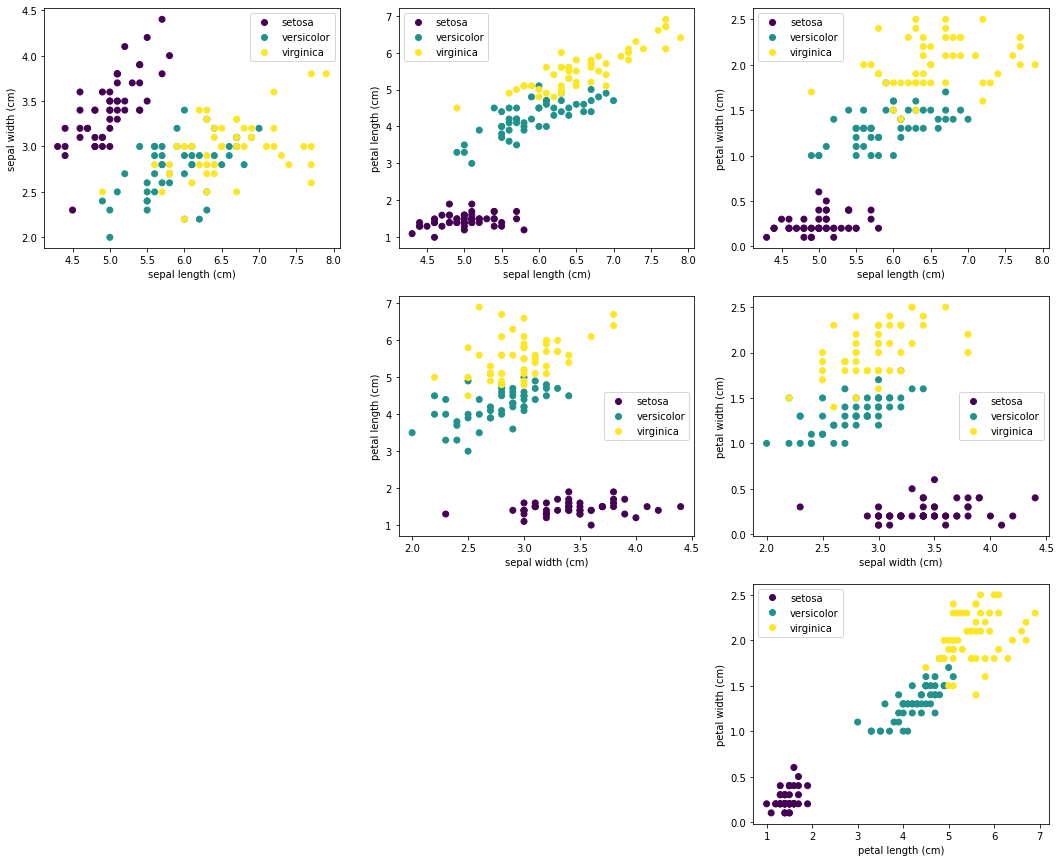

In [21]:
fig, reps = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
for i in range(4):
    for j in range(4):
        if i < j:
            nuage = reps[i,j-1].scatter(X[:, i], X[:, j], c=y)
            couleurs, _= nuage.legend_elements()
            reps[i,j-1].set_xlabel(dataset.feature_names[i])
            reps[i,j-1].set_ylabel(dataset.feature_names[j])
            reps[i,j-1].legend(couleurs, dataset.target_names)

reps[1, 0].axis("off")
reps[2, 0].axis("off")
reps[2, 1].axis("off");

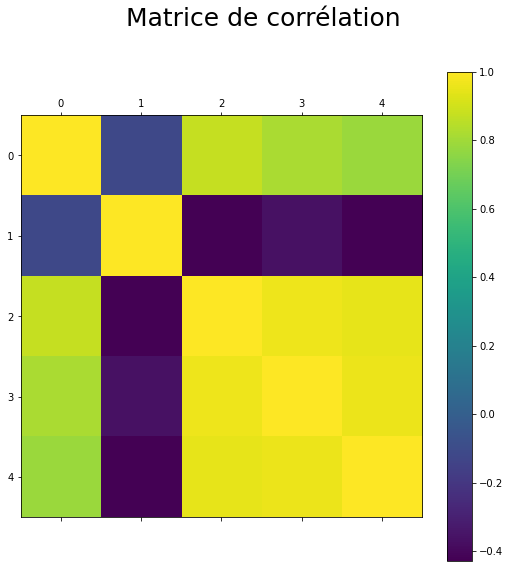

In [22]:
M = np.vstack((X.T, y[:, np.newaxis].T))
corr = np.corrcoef(M)
fig, rep = plt.subplots(figsize=(9, 9))
image = rep.matshow(corr)
fig.colorbar(image)
fig.suptitle("Matrice de corrélation", fontsize=25);

# Essai de `DummyClassifier` pour avoir une base de comparaison

In [23]:
bateau = DummyClassifier(strategy="most_frequent")

In [24]:
%%time
score = cross_val_score(
    bateau, 
    X_tr, 
    y_tr,
)
resultats[bateau] = np.mean(score)

CPU times: user 6.26 ms, sys: 858 µs, total: 7.12 ms
Wall time: 6.72 ms


# Modèles élémentaires

In [25]:
c = LogisticRegression()

In [26]:
c.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [27]:
%%time
g = GridSearchCV(
    estimator=c,
    param_grid={
        "C": [0.1, 1., 10, 100],
        "max_iter": [1000,],
    }
)
g.fit(X_tr, y_tr)
    

CPU times: user 781 ms, sys: 3.28 ms, total: 784 ms
Wall time: 781 ms


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1.0, 10, 100], 'max_iter': [1000]})

In [28]:
resultats[g] = g.best_score_

In [29]:
c = KNeighborsClassifier()
c.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [30]:
%%time
g = GridSearchCV(
    estimator=c,
    param_grid={
        "n_neighbors": [3, 5, 7, 9],
    }
)
g.fit(X_tr, y_tr)

CPU times: user 62.7 ms, sys: 2.79 ms, total: 65.5 ms
Wall time: 64.4 ms


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9]})

In [31]:
resultats[g] = g.best_score_

In [32]:
c = GaussianNB()
c.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [33]:
%%time
score = cross_val_score(c, X_tr, y_tr)
resultats[c] = np.mean(score)

CPU times: user 13 ms, sys: 1.17 ms, total: 14.2 ms
Wall time: 14.1 ms


In [34]:
c = DecisionTreeClassifier()
c.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [35]:
%%time
score = cross_val_score(c, X_tr, y_tr)
resultats[c] = np.mean(score)

CPU times: user 11.9 ms, sys: 0 ns, total: 11.9 ms
Wall time: 11.3 ms


# Modèles moins élémentaires

In [36]:
c = RandomForestClassifier()
c.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [37]:
%%time
g = GridSearchCV(
    estimator=c,
    param_grid={
        "n_estimators": [50, 100, 150, 200],
    }
)
g.fit(X_tr, y_tr);

CPU times: user 3.53 s, sys: 26.9 ms, total: 3.56 s
Wall time: 3.56 s


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 100, 150, 200]})

In [38]:
resultats[g] = g.best_score_

In [39]:
c = MLPClassifier()
c.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [40]:
%%time
g = GridSearchCV(
    estimator=c,
    param_grid={
        "hidden_layer_sizes": [(200, ), (100, 100), (50, 100, 50), (25, 75, 75, 25)],
        "max_iter": [1000,],
    }
)
g.fit(X_tr, y_tr);

CPU times: user 34.8 s, sys: 20.7 s, total: 55.5 s
Wall time: 17.6 s


GridSearchCV(estimator=MLPClassifier(),
             param_grid={'hidden_layer_sizes': [(200,), (100, 100),
                                                (50, 100, 50),
                                                (25, 75, 75, 25)],
                         'max_iter': [1000]})

In [41]:
resultats[g] = g.best_score_

In [42]:
c = SVC()
c.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [43]:
%%time
g = GridSearchCV(
    estimator=c,
    param_grid={
        "C": [0.1 * 2 ** j for j in range(10)],
    }
)
g.fit(X_tr, y_tr);

CPU times: user 140 ms, sys: 955 µs, total: 140 ms
Wall time: 140 ms


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4, 12.8, 25.6,
                               51.2]})

In [44]:
resultats[g] = g.best_score_

# Conclusion

In [45]:

resume = Table()
resume.add_column("Score")
resume.add_column("Modele")
resume.add_column("Meilleur choix de Paramètres")
for score, modele in sorted(
    [(score, modele) for modele, score in resultats.items()], 
    key=lambda x: x[0]
):
    try:
        mod_str = str(modele.best_estimator_)
        resume.add_row(str(score), mod_str[:mod_str.find("(")], str(modele.best_params_))
    except AttributeError:
        mod_str = str(modele)
        resume.add_row(str(score), mod_str[:mod_str.find("(")], "")
print(resume)

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Score               ┃ Modele                 ┃ Meilleur choix de Paramètres               ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ 0.32134387351778654 │ DummyClassifier        │                                            │
│ 0.9466403162055336  │ DecisionTreeClassifier │                                            │
│ 0.9644268774703558  │ RandomForestClassifier │ {'n_estimators': 100}                      │
│ 0.9735177865612649  │ GaussianNB             │                                            │
│ 0.9826086956521738  │ LogisticRegression     │ {'C': 10, 'max_iter': 1000}                │
│ 0.9826086956521738  │ KNeighborsClassifier   │ {'n_neighbors': 3}                         │
│ 0.9826086956521738  │ MLPClassifier          │ {'hidden_layer_sizes': (200,), 'max_iter': │
│                     │                        │ 1000}                                      │
│ 0.9826086956521738  │ SVC                    │ {'C': 1.6}                                 │
└─────────────────────┴────────────────────────┴────────────────────────────────────────────┘

In [46]:
meilleur_score = max(resultats.values())
meilleur_modele, *_ = [
    modele for modele, score in resultats.items() if score == meilleur_score
]    

In [47]:
print("Meilleur modèle: ", meilleur_modele.best_estimator_)
print("De paramètres: ", meilleur_modele.best_params_)
print("Score de crossvalidation: ", meilleur_modele.best_score_)

Meilleur modèle:  LogisticRegression(C=10, max_iter=1000)

De paramètres: 
{'C': 10, 'max_iter': 1000}

Score de crossvalidation:  0.9826086956521738

In [48]:
meilleur_modele.fit(X_tr, y_tr)
meilleur_modele.score(X_tr, y_tr)

0.9910714285714286

In [49]:
meilleur_modele.score(X_te, y_te)

0.9210526315789473

In [50]:
meilleur_modele.best_params_

{'C': 10, 'max_iter': 1000}

In [51]:
cm_tr = confusion_matrix(y_tr, meilleur_modele.predict(X_tr))
cm_tr

array([[38,  0,  0],
       [ 0, 35,  1],
       [ 0,  0, 38]])

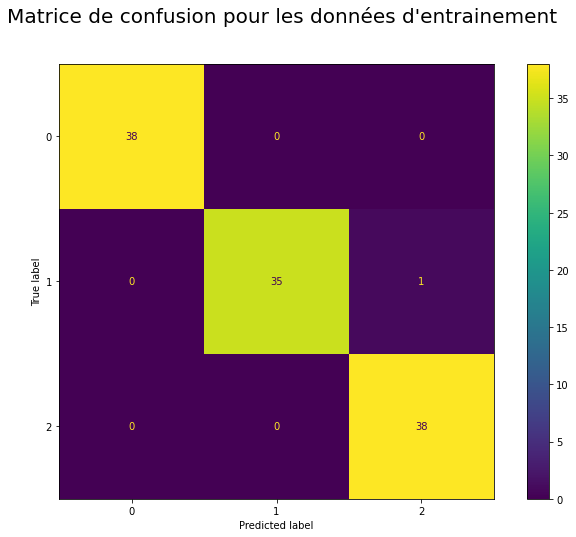

In [52]:
fig, rep = plt.subplots(figsize=(12, 8))
ConfusionMatrixDisplay(cm_tr, display_labels=meilleur_modele.classes_).plot(ax=rep);
fig.suptitle("Matrice de confusion pour les données d'entrainement", fontsize=20);

In [53]:
cm_te = confusion_matrix(y_te, meilleur_modele.predict(X_te))
cm_te

array([[12,  0,  0],
       [ 0, 12,  2],
       [ 0,  1, 11]])

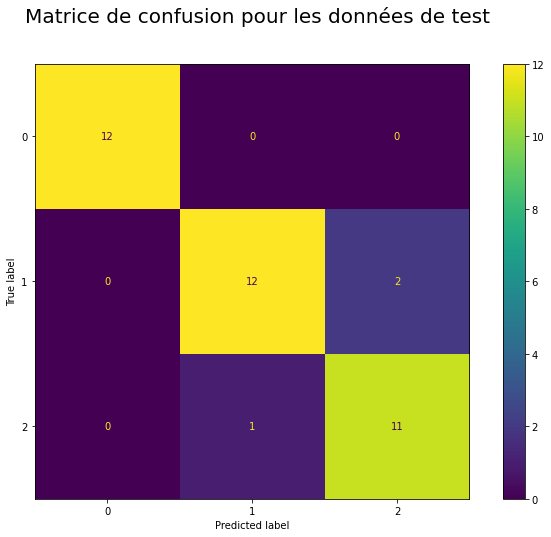

In [54]:
fig, rep = plt.subplots(figsize=(12, 8))
ConfusionMatrixDisplay(cm_te, display_labels=meilleur_modele.classes_).plot(ax=rep)
fig.suptitle("Matrice de confusion pour les données de test", fontsize=20);